In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size = 100)
X = x.reshape(-1, 1)
y = x**2 + x + 2  + np.random.normal(size=100)
y.shape

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

line_reg = LinearRegression()
def PolyRegression(degree = 50):
    return Pipeline([
            ('Poly', PolynomialFeatures(degree=degree)),
            ('sta_scaler', StandardScaler()),
            ('line_reg', line_reg)
        ])

poly_reg50 = PolyRegression(degree = 50)
poly_reg50.fit(X, y)

Pipeline(steps=[('Poly', PolynomialFeatures(degree=50)),
                ('sta_scaler', StandardScaler()),
                ('line_reg', LinearRegression())])

In [3]:
# 绘制图像的函数
def plot_mode(model):
    plt.scatter(x, y)
    y_predict = model.predict(X)
    plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')

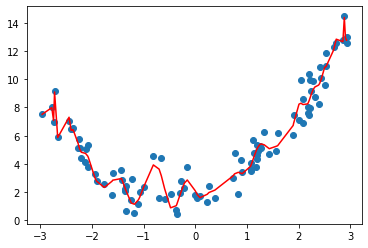

In [4]:
plot_mode(poly_reg50)

In [5]:
line_reg.coef_

array([ 3.58738917e+12, -1.30970679e+01,  3.20593267e+01,  1.63671422e+03,
       -5.69759929e+03, -7.69903328e+04,  2.81268077e+05,  1.97682778e+06,
       -6.73636932e+06, -3.20331414e+07,  9.68135887e+07,  3.50189419e+08,
       -9.24303076e+08, -2.67503208e+09,  6.20268249e+09,  1.45578272e+10,
       -3.02097242e+10, -5.68076910e+10,  1.08448625e+11,  1.57321529e+11,
       -2.87135476e+11, -2.96604372e+11,  5.50606805e+11,  3.33376281e+11,
       -7.24428861e+11, -9.35160442e+10,  5.52811440e+11, -3.01261063e+11,
       -4.40020044e+10,  3.64424178e+11, -3.55189037e+11,  8.29106180e+10,
        2.52612863e+11, -4.11705389e+11,  1.09244120e+11,  7.36772086e+10,
       -2.13637157e+11,  3.96071682e+11,  3.67559064e+10, -2.36502470e+11,
        9.03793526e+10, -2.78891940e+11, -9.07123507e+10,  4.49638111e+11,
        8.49059864e+10, -2.52497452e+11, -7.78932428e+10,  6.35442680e+10,
        4.02644570e+10, -5.38030875e+09, -8.19043431e+09])

出现过拟合的原因是某些参数的值过大

### 使用岭回归

In [6]:
%%html
<img src="./img/多项式回归损失函数.png", width=400, height=200>

In [7]:
%%html
<img src="./img/岭回归损失函数.png", width=400, height=200>

In [8]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
            ('Poly', PolynomialFeatures(degree=degree)),
            ('sta_scaler', StandardScaler()),
            ('rid_reg', Ridge(alpha=alpha))
        ])

In [9]:
from sklearn.metrics import mean_squared_error
rid_reg20 = RidgeRegression(20, 10)
rid_reg20.fit(X, y)
ridge_reg20_predict = rid_reg20.predict(X)
mean_squared_error(y, ridge_reg20_predict)

0.9324867362582999

In [10]:
# 绘制图像的函数
def plot_mode(model):
    plt.scatter(x, y)
    y_predict = model.predict(X)
    plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')

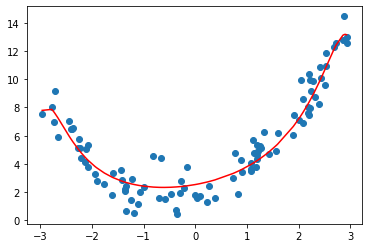

In [11]:
plot_mode(rid_reg20)

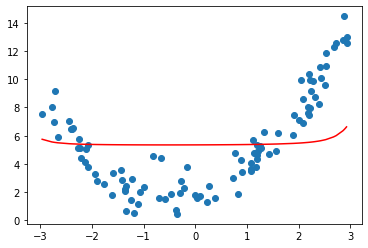

In [12]:
rid_reg10000 = RidgeRegression(20, 10000)
rid_reg10000.fit(X, y)
ridge_reg10000_predict = rid_reg10000.predict(X)
mean_squared_error(y, ridge_reg10000_predict)
plot_mode(rid_reg10000)

当$\alpha$非常大时，我们的曲线会趋向于直线，这是因为损失函数是平方，当$\alpha$很大时，<br>
只会使得$\theta$值变得比较小，因此会出现很多值出现趋向于0的情况，所以预测出来的线会趋向于直线

### END